#Checkpoint 1
https://github.com/FrancoTSolis/CS145-RecSys/blob/main/checkpoint1_directive.md

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

def get_full_df(dir_name):
  folder_path = f"/content/drive/MyDrive/data_cs145/{dir_name}"
  csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

  dfs = []
  for file in csv_files:
      file_path = os.path.join(folder_path, file)
      df = pd.read_csv(file_path)
      dfs.append(df)

  entire_df = pd.concat(dfs, ignore_index=True)

  return entire_df

history_df = get_full_df("history_df")
items_df = get_full_df("items_df")
users_df = get_full_df("users_df")
users_df.columns

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data_cs145/history_df'

## 1. Feature Processing

In [ ]:
# Feature Engineering (user behavior)
user_interactions = history_df.groupby('user_idx').size().rename('total_interactions')
users_df = users_df.merge(user_interactions, on='user_idx', how='left').fillna(0)
pos_rate = history_df.groupby('user_idx')['relevance'].mean().rename('positive_rate')
users_df = users_df.merge(pos_rate, on='user_idx', how='left').fillna(0)
users_df

,user_attr_0,user_attr_1,user_attr_2,user_attr_3,user_attr_4,user_attr_5,user_attr_6,user_attr_7,user_attr_8,user_attr_9,...,user_attr_14,user_attr_15,user_attr_16,user_attr_17,user_attr_18,user_attr_19,user_idx,segment,total_interactions,positive_rate
0,-0.143423,-0.032656,0.064295,0.946861,-0.747217,-0.846347,1.236620,-0.462645,-1.263035,-0.485130,...,0.819974,0.946244,-0.688082,-0.198602,-0.989915,-0.210488,750,mainstream,1.0,0.0
1,0.684105,0.134583,1.311481,-1.141416,0.500238,-1.248303,0.094176,0.740333,-0.214503,0.551127,...,-0.996045,1.222194,0.043423,-1.335692,-1.131505,0.015785,751,mainstream,0.0,0.0
2,-0.404462,-1.312913,-1.694039,-0.846719,0.193809,-0.006401,-0.501238,0.201887,1.040027,0.394127,...,-0.201088,-1.236953,-0.419874,-2.074960,1.912178,-0.937414,752,mainstream,0.0,0.0
3,1.586114,0.038085,0.564864,-0.488800,0.207930,0.650490,0.664552,0.774773,-0.368333,-0.480360,...,0.305173,-0.766480,-1.697096,1.041667,-1.796277,-0.340604,753,mainstream,0.0,0.0
4,-0.224307,-0.069455,0.035803,0.138148,-2.415363,0.014656,-2.229576,0.732218,-0.555125,-2.157037,...,0.344445,1.181222,-0.096144,0.754188,0.683861,-1.286469,754,mainstream,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.621244,-0.054667,-1.352343,0.747086,1.030490,-1.074868,-0.733694,0.752330,0.839142,-0.490647,...,1.042259,0.465039,1.789594,-0.292254,0.561253,-1.198427,995,premium,0.0,0.0
996,-1.438527,1.096334,-1.285026,0.271782,1.511295,1.246685,-0.164585,-1.088503,1.009495,1.842257,...,1.728518,-0.739607,-0.998282,2.839996,0.322677,0.752893,996,premium,0.0,0.0
997,-0.191931,0.989962,1.460061,0.799796,2.240858,0.173255,0.237118,0.731406,0.964962,0.727947,...,0.532482,-0.461523,-0.635391,-2.115469,2.247237,1.055731,997,premium,0.0,0.0
998,0.383236,-0.167223,-2.376032,-0.228529,1.215866,1.442174,1.142292,0.658392,1.803874,0.171463,...,-0.564496,1.159068,-0.242746,-0.533029,1.213735,0.827970,998,premium,0.0,0.0


In [ ]:
# Feature Engineering (item behavior)
item_popularity = history_df.groupby('item_idx').size().rename('popularity')
items_df = items_df.merge(item_popularity, on='item_idx', how='left').fillna(0)
items_df

,item_attr_0,item_attr_1,item_attr_2,item_attr_3,item_attr_4,item_attr_5,item_attr_6,item_attr_7,item_attr_8,item_attr_9,...,item_attr_14,item_attr_15,item_attr_16,item_attr_17,item_attr_18,item_attr_19,item_idx,category,price,popularity
0,-0.853637,0.265554,-0.822813,-0.675781,-0.202484,0.645097,0.751848,0.779045,-1.388084,0.193335,...,0.711526,0.281247,-0.349321,1.125762,-2.021234,0.135735,175,home,33.781426,2.0
1,-1.563251,-0.712193,0.724814,-1.074197,-1.223718,2.581945,-1.159289,1.850521,0.027798,-0.324829,...,1.046870,0.487994,1.301918,0.715112,2.008224,0.378589,176,home,70.920967,0.0
2,0.421811,0.521721,0.057511,1.048087,0.437041,0.988180,1.144500,0.628455,0.701716,-0.810330,...,-0.367863,0.223621,-0.679274,-0.622520,0.674920,1.781376,177,home,70.374743,0.0
3,-1.831824,0.029524,0.663280,0.980214,0.519127,1.961403,0.228907,1.511993,-0.446368,0.257983,...,-0.113369,0.786429,0.597434,-0.794651,-0.736767,0.172231,178,home,62.173724,0.0
4,0.859574,2.062896,0.502991,1.207531,-1.412851,2.212956,0.805686,0.150395,0.035304,-0.907200,...,-0.502220,-0.998181,0.215307,1.288911,-0.410492,-1.173324,179,home,26.503979,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.409357,-0.096055,-1.194628,0.002823,0.578279,1.502827,-1.541358,0.975473,0.131153,-0.450667,...,-0.632997,0.943600,1.485401,-0.035032,-2.787289,-0.199049,145,clothing,39.022119,0.0
196,0.032426,-0.232773,0.336339,-0.476910,0.838871,-1.166713,1.236849,1.550079,-0.913060,-0.913600,...,0.737607,1.980196,0.170784,-0.610838,0.051244,-0.150588,146,clothing,45.023710,2.0
197,-0.136557,-0.023804,-0.931767,0.282218,-1.408663,-0.716827,-0.118879,-2.259553,0.768992,-2.053155,...,2.198140,0.116452,-1.982626,0.953695,-0.231918,0.069907,147,clothing,29.138289,0.0
198,0.557863,-2.225378,0.006537,-0.409694,1.221835,0.727114,-1.627002,1.262626,0.449525,-1.547242,...,-1.512629,-0.791227,-0.942871,1.376934,-0.491016,-1.162817,148,clothing,71.744212,0.0


In [ ]:
# Feature Normalization (attr_ features looks normalized but also normalize them for sanity checks)
from sklearn.preprocessing import StandardScaler
# Identify user and item feature columns (excluding indices and categorical)
user_feat_cols = [col for col in users_df.columns if col.startswith('user_attr_')] + ["total_interactions", "positive_rate"]
item_feat_cols = [col for col in items_df.columns if col.startswith('item_attr_')] + ['price', 'popularity']

user_scaler = StandardScaler()
item_scaler = StandardScaler()

users_df[user_feat_cols] = user_scaler.fit_transform(users_df[user_feat_cols])
items_df[item_feat_cols] = item_scaler.fit_transform(items_df[item_feat_cols])

In [ ]:
data = history_df.merge(users_df, on='user_idx', how='left')
data = data.merge(items_df, on='item_idx', how='left')
data.head()

,user_idx,item_idx,relevance,user_attr_0,user_attr_1,user_attr_2,user_attr_3,user_attr_4,user_attr_5,user_attr_6,...,item_attr_13,item_attr_14,item_attr_15,item_attr_16,item_attr_17,item_attr_18,item_attr_19,category,price,popularity
0,964,93,1,1.764390,1.567356,1.451270,0.197447,0.155696,0.805435,0.400740,...,0.926242,-0.768808,-0.330952,-1.120222,-2.035231,0.439258,-0.318475,books,1.396280,1.036952
1,780,92,0,0.230750,-0.727825,2.148461,1.371836,-0.689963,-0.081169,0.283084,...,0.358120,-1.110386,0.145755,1.022626,-1.244695,0.109274,-1.101479,books,1.233933,1.036952
2,294,128,1,-2.686496,0.915833,0.283031,-1.856472,-1.834163,1.102690,-1.108134,...,-0.465514,-0.393030,2.225810,-0.207694,0.669638,0.679940,-1.150731,clothing,1.314441,0.000000
3,357,79,0,-2.981876,0.425974,0.152364,-1.556541,0.282732,0.468218,0.606994,...,-0.278822,0.877607,-0.103058,-1.798340,-1.525545,0.248559,-0.511935,books,0.930296,1.036952
4,80,41,0,-0.619450,0.898501,-0.964987,-1.198358,-0.912819,-1.289029,-0.300756,...,-0.676563,0.531453,-1.593465,0.114759,-0.956495,-0.118259,-0.226252,books,-0.241009,0.000000


In [ ]:
missing_data= data.isnull().sum()
missing_data.sum()
# No missing value: data well generated!

np.int64(0)

In [ ]:
# Categorical one-hot encoding
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data.head()
users_df = pd.get_dummies(users_df, columns=['segment'], drop_first=True)
items_df = pd.get_dummies(items_df, columns=['category'], drop_first=True)

In [ ]:
items_df

,item_attr_0,item_attr_1,item_attr_2,item_attr_3,item_attr_4,item_attr_5,item_attr_6,item_attr_7,item_attr_8,item_attr_9,...,item_attr_16,item_attr_17,item_attr_18,item_attr_19,item_idx,price,popularity,category_clothing,category_electronics,category_home
0,-0.803629,0.312741,-0.769316,-0.602187,-0.248907,0.674328,0.652908,0.765748,-1.350593,0.201955,...,-0.358628,1.022842,-2.068206,0.131092,175,-0.717976,1.036952,False,False,True
1,-1.514411,-0.678532,0.676954,-1.014293,-1.245460,2.806882,-1.096533,1.764578,0.081847,-0.316315,...,1.271905,0.631962,1.973013,0.367682,176,1.013326,-1.036952,False,False,True
2,0.473916,0.572453,0.053354,1.180914,0.375162,1.052077,1.012338,0.625368,0.763647,-0.801914,...,-0.684445,-0.641269,0.635817,1.734289,177,0.987863,-1.036952,False,False,True
3,-1.783425,0.073446,0.619451,1.110709,0.455264,2.123638,0.174211,1.449002,-0.397863,0.266615,...,0.576255,-0.805113,-0.779990,0.166647,178,0.605563,-1.036952,False,False,True
4,0.912399,2.134948,0.469659,1.345837,-1.430022,2.400609,0.702191,0.179721,0.089441,-0.898803,...,0.198919,1.178135,-0.452763,-1.144204,179,-1.057222,-1.036952,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.360264,-0.053870,-1.116780,0.099735,0.512986,1.618726,-1.446275,0.948858,0.186411,-0.442178,...,1.453087,-0.082066,-2.836497,-0.195058,145,-0.473675,-1.036952,True,False,False
196,0.083891,-0.192480,0.313921,-0.396482,0.767280,-1.320554,1.096874,1.484506,-0.870013,-0.905205,...,0.154955,-0.630150,0.010321,-0.147847,146,-0.193904,1.036952,True,False,False
197,-0.085370,0.019381,-0.871134,0.388729,-1.425935,-0.825209,-0.144149,-2.066833,0.831709,-2.044990,...,-1.971455,0.859058,-0.273668,0.066961,147,-0.934421,-1.036952,True,False,False
198,0.610192,-2.212650,0.005718,-0.326957,1.140989,0.764632,-1.524674,1.216542,0.508507,-1.538975,...,-0.944736,1.261920,-0.533522,-1.133968,148,1.051702,-1.036952,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
target_col = "relevance"
X = data.drop(columns=['user_idx', 'item_idx', target_col])
y = data[target_col]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## 2. Model Implementation
When implementing your model, please add 1-2 regularization schema so that we can satisfy requirement 4 \
### Regularization Techniques:
* L1 regularization: Encourages sparse feature selection
* L2 regularization: Prevents large coefficient values
* Dropout: For neural network approaches
* Early stopping: Prevent overfitting by monitoring validation performance
* Cross-validation: Ensure robust hyperparameter selection

## 3. Ranking Optimization

###(a) KNN (Chana)

* Experiment with different distance metrics (Euclidean, cosine, Manhattan)
* Try different values of k (3, 5, 10, 20)
* Consider user-based and item-based similarity approaches

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(algorithm='brute')

param_grid = {
    'n_neighbors': [3, 5, 10, 20],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

best_knn_model = grid_search.best_estimator_
feature_columns = X_train.columns.tolist()

print("Best KNN parameters:", grid_search.best_params_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best KNN parameters: {'metric': 'cosine', 'n_neighbors': 20, 'weights': 'distance'}


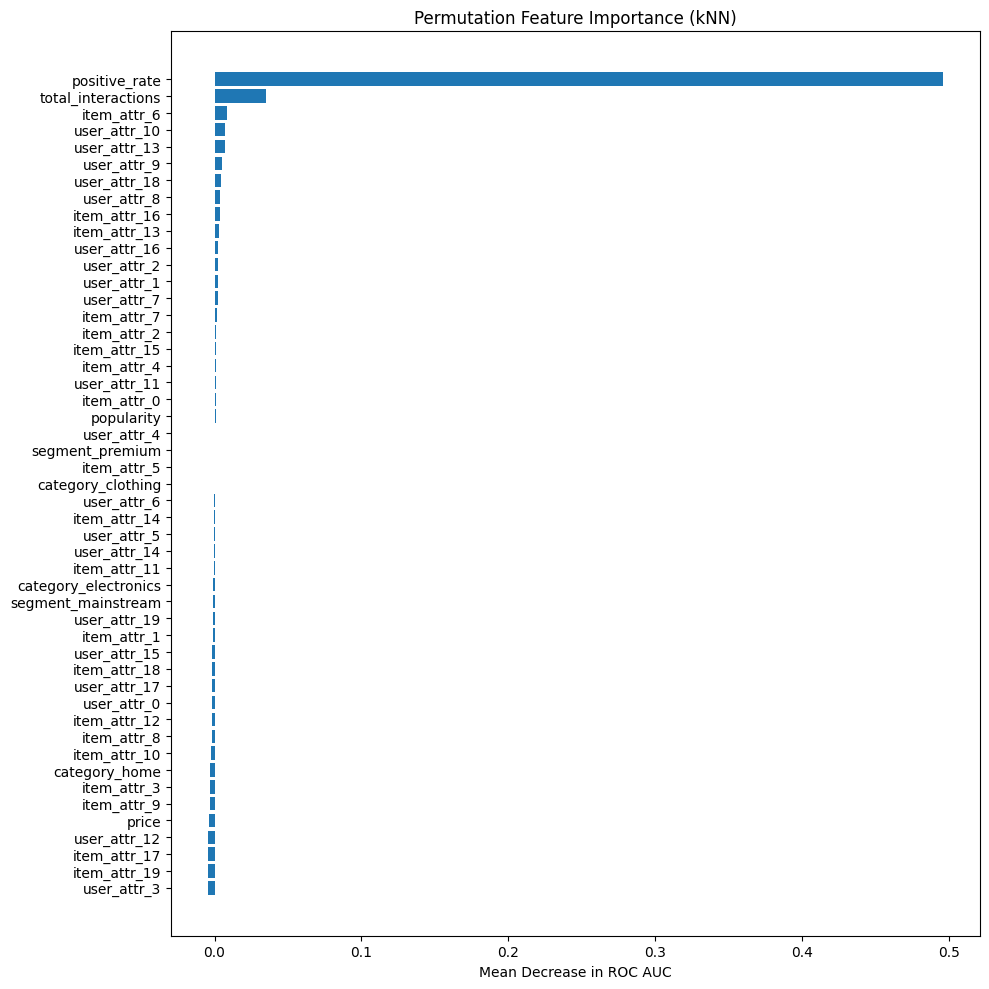

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

importances = result.importances_mean
feature_names = X_test.columns

sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Mean Decrease in ROC AUC")
plt.title("Permutation Feature Importance (kNN)")
plt.tight_layout()
plt.show()


Accuracy on test set: 0.875
ROC AUC on test set: 0.9846547314578005

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.80      0.94      0.86        17

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



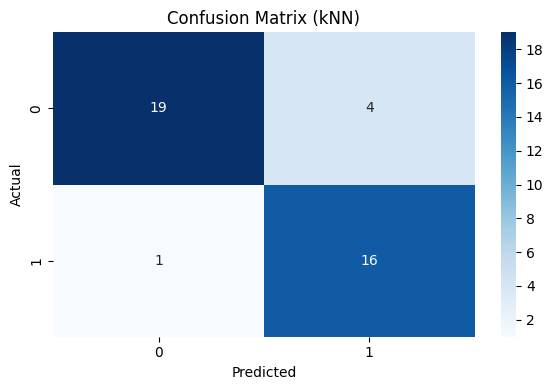

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_knn_model.predict(X_test)
y_proba = best_knn_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC on test set:", roc_auc)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (kNN)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def predict_knn(log, k, users, items, user_features=None, item_features=None, filter_seen_items=True):
    """
    Generate top-k recommendations per user using kNN, ranked by expected revenue (prob × price).
    """
    recommendations = []
    model = best_knn_model


    if user_features is not None:
        users = users.merge(user_features.drop_duplicates(subset='user_idx'), on="user_idx", how="left")

    if item_features is not None and 'price' not in items.columns:
        item_features = item_features.drop_duplicates(subset="item_idx")
        items = items.merge(item_features, on="item_idx", how="left")

    if 'price' not in items.columns:
        raise KeyError("'price' column not found in items DataFrame. Make sure your items_df includes it.")

    item_price_map = dict(zip(items['item_idx'], items['price']))
    user_ids = users['user_idx'].unique()

    for uid in user_ids:
        u_feat = users[users['user_idx'] == uid].drop(columns='user_idx')
        candidate_items = items.copy()

        if filter_seen_items and log is not None:
            seen_items = log[log['user_idx'] == uid]['item_idx'].unique()
            candidate_items = candidate_items[~candidate_items['item_idx'].isin(seen_items)]

        if candidate_items.empty:
            continue

        u_repeated = pd.concat([u_feat] * len(candidate_items), ignore_index=True)

        i_feat = candidate_items.drop(columns=['item_idx', 'price']).reset_index(drop=True)
        item_ids = candidate_items['item_idx'].values
        prices = candidate_items['price'].values

        model_input = pd.concat([u_repeated.reset_index(drop=True), i_feat], axis=1)
        model_input = model_input.reindex(columns=feature_columns, fill_value=0)

        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(model_input)[:, 1]
        else:
            probs = model.predict(model_input)

        revenue_scores = probs * prices
        top_k_idx = np.argsort(revenue_scores)[-k:][::-1]
        top_items = item_ids[top_k_idx]
        top_scores = revenue_scores[top_k_idx]

        for item_id, score in zip(top_items, top_scores):
            recommendations.append({
                'user_idx': uid,
                'item_idx': item_id,
                'relevance': score
            })

    return pd.DataFrame(recommendations)


In [ ]:
recommendations_df = predict_knn(
    log=history_df,
    k=5,
    users=users_df,
    items=items_df,
    user_features=users_df,
    item_features=items_df,
    filter_seen_items=True
)

recommendations_df.head()


,user_idx,item_idx,relevance
0,750,194,1.468300
1,750,139,1.175060
2,750,132,1.074917
3,750,56,1.026007
4,750,192,1.022543


###(b) Logistic Regression (Ria)
* Implement binary classification to predict purchase likelihood
* Try different regularization approaches (L1, L2, ElasticNet)
* Tune regularization strength parameters

In [ ]:
# import necessary libraries to create the model, tune parameters, and assess the model's performance
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# tune the model with different regularization methods and different regularization strength parameters
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear']  # or 'saga' for large data
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.5, 0.9],
        'solver': ['saga']
    }
]


lr = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

# evalute the best model on the test data set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'C': 10, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
Best cross-validation score: 0.9625
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.80      0.94      0.86        17

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



**Plotting the Best Model's ROC Curve and AUC Score**

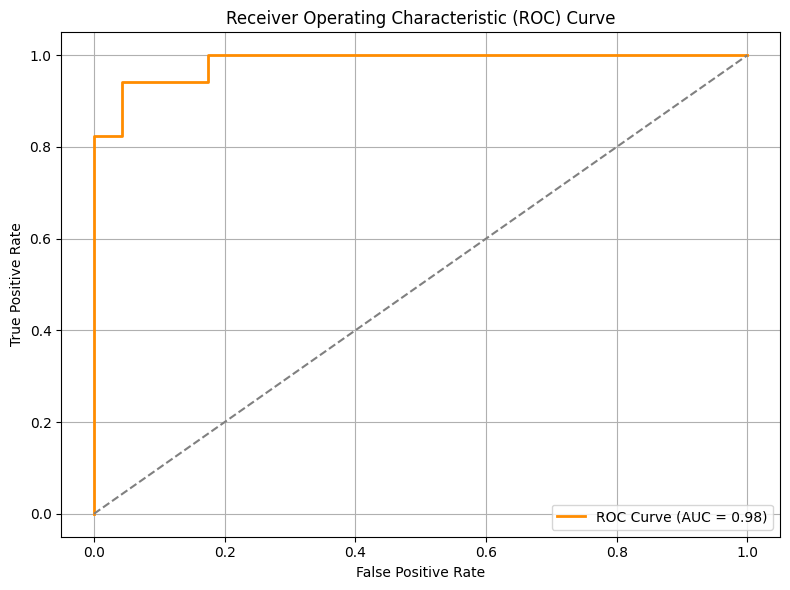

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

The best performing model had an AUC score - 0.98, (which indicates **poor model performance**, since the model is performing worse than a random guess between the labels. This could be due to an inverse or potentially nonlinear relationship between the features and the label)

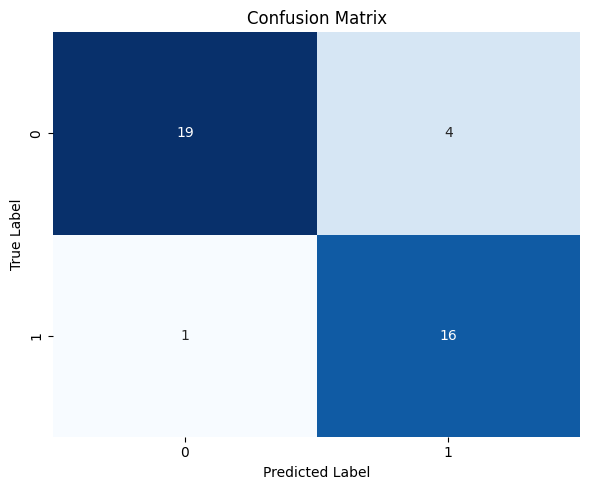

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

<ipython-input-15-462dfc1104cf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')


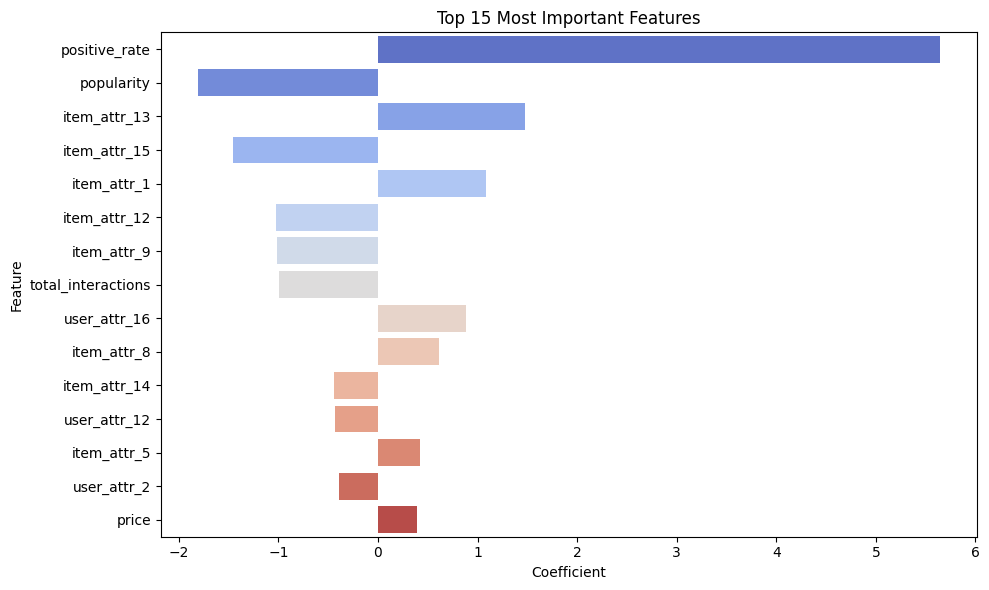

In [ ]:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
coefficients = best_model.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()


###(d) Random Forest (Zhiyi)
* Implement ensemble of decision trees
* Tune number of trees, maximum features, and other hyperparameters
* Analyze feature importance


In [ ]:
# Model Training with GridSearch CrossValidation on hyperparams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [60, 100],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2', 0.5],
    'min_samples_split': [5, 8, 12],
    'min_samples_leaf': [5, 10],
    'criterion': ['gini', 'entropy'],

}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 60}


In [ ]:
feature_columns = X_train.columns.tolist()

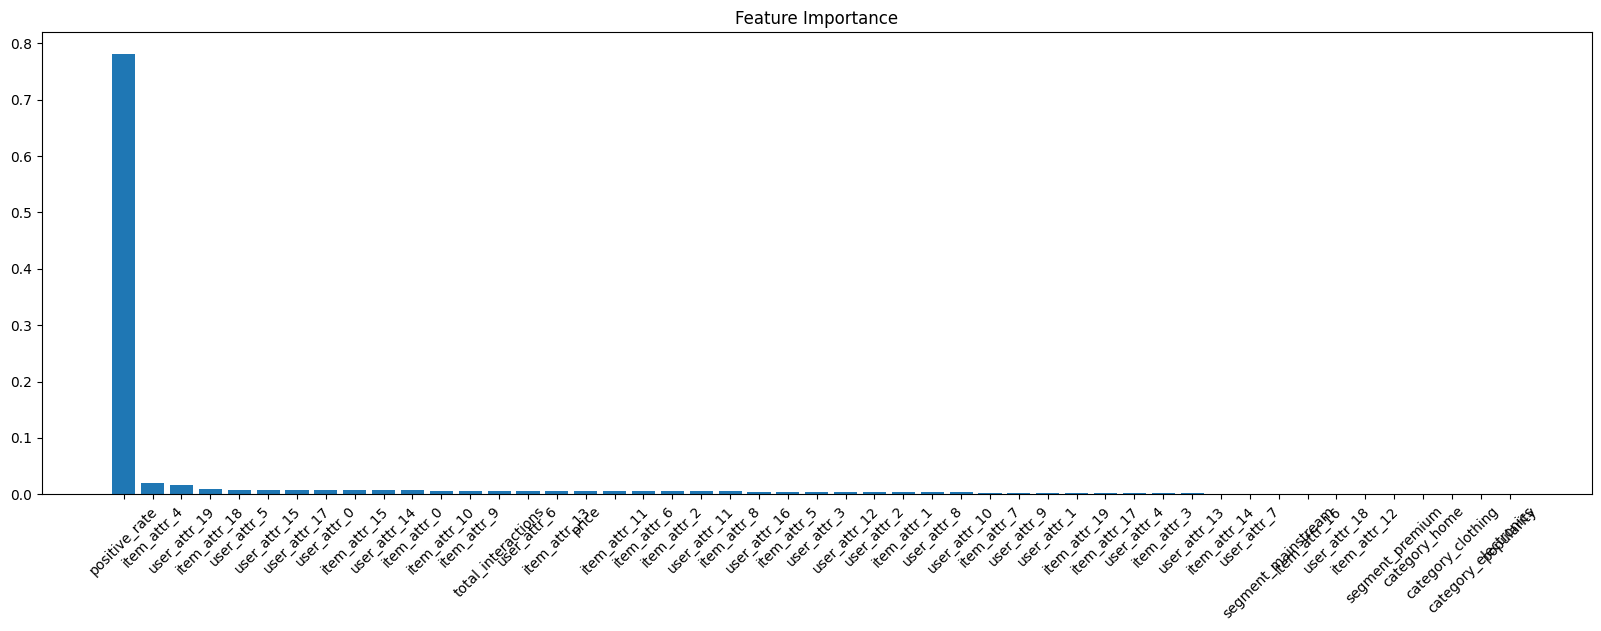

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(20, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=45)
plt.title("Feature Importance")
plt.show()


Accuracy on test set: 0.9
ROC AUC on test set: 0.989769820971867
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.81      1.00      0.89        17

    accuracy                           0.90        40
   macro avg       0.90      0.91      0.90        40
weighted avg       0.92      0.90      0.90        40



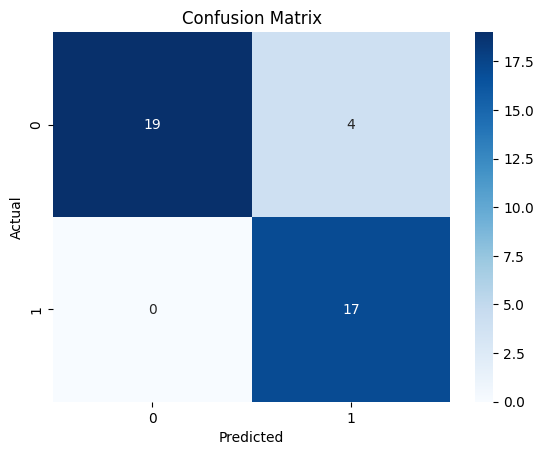

In [ ]:
# Model Testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

y_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC on test set:", roc_auc)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def predict(best_model, users_df, items_df, log_df,
            user_features=None, item_features=None,
            feature_columns=None, k=3, filter_seen_items=True):

    if user_features is not None:
        users_df = users_df.merge(user_features, on="user_idx", how="left")

    if item_features is not None:
        items_df = items_df.merge(item_features, on="item_idx", how="left")

    all_recommendations = []

    for uid in users_df['user_idx'].unique():
        if filter_seen_items:
            seen_items = log_df[log_df['user_idx'] == uid]['item_idx'].unique()
            candidates = items_df[~items_df['item_idx'].isin(seen_items)].copy()
        else:
            candidates = items_df.copy()

        if candidates.empty:
            continue

        uid_df = pd.DataFrame({'user_idx': [uid] * len(candidates), 'item_idx': candidates['item_idx'].values})
        merged = uid_df.merge(users_df, on='user_idx', how='left')
        merged = merged.merge(candidates, on='item_idx', how='left')

        prices = merged['price'].values
        model_input = merged.drop(columns=['user_idx', 'item_idx'])

        model_input = pd.get_dummies(model_input)
        model_input = model_input.reindex(columns=feature_columns, fill_value=0)

        if hasattr(best_model, "predict_proba"):
            probs = best_model.predict_proba(model_input)[:, 1]
        else:
            probs = best_model.predict(model_input)

        expected_revenue = probs * prices

        sorted_idx = np.argsort(-expected_revenue)
        top_k_idx = sorted_idx[:k]

        for rank, idx in enumerate(top_k_idx):
            item_id = candidates.iloc[idx]['item_idx']
            base_score = expected_revenue[idx]
            discounted_score = base_score / np.log2(rank + 2)

            all_recommendations.append({
                'user_idx': uid,
                'item_idx': item_id,
                'relevance': discounted_score
            })

    return pd.DataFrame(all_recommendations)

predict(best_model, users_df, items_df, history_df, feature_columns=feature_columns, k=3)

,user_idx,item_idx,relevance
0,750,194,0.461068
1,750,132,0.233657
2,750,126,0.153964
3,751,194,0.549321
4,751,139,0.294523
...,...,...,...
2995,998,139,0.242479
2996,998,126,0.175592
2997,999,194,0.509463
2998,999,139,0.239066


## 5. Eval & Comparison

In [ ]:
import os
import numpy as np
import pandas as pd
from typing import Dict, List, Optional, Union

from pyspark.sql import SparkSession, DataFrame
from pyspark.sql import functions as sf
from pyspark.ml import Transformer, PipelineModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.param.shared import HasOutputCol, HasInputCol
from pyspark.sql import Window

class RankingMetrics:
    """
    Implementation of ranking metrics for recommendation evaluation.
    """

    def __init__(self, k=5, user_col="user_idx", item_col="item_idx",
                 relevance_col="relevance", response_col="response",
                 rank_col="rank", price_col="price", revenue_col="revenue"):
        """
        Initialize ranking metrics evaluator.

        Args:
            k: Cutoff for position-aware metrics
            user_col: User identifier column
            item_col: Item identifier column
            relevance_col: Column with predicted relevance scores
            response_col: Column with actual user responses (ground truth)
            rank_col: Column with ranking position (1-based)
            price_col: Column with item prices
            revenue_col: Column with revenue values
        """
        self.k = k
        self.user_col = user_col
        self.item_col = item_col
        self.relevance_col = relevance_col
        self.response_col = response_col
        self.rank_col = rank_col
        self.price_col = price_col
        self.revenue_col = revenue_col

    def evaluate(self, df: DataFrame) -> Dict[str, float]:
        """
        Calculate ranking metrics on the given DataFrame.

        Args:
            df: DataFrame with recommendations and responses

        Returns:
            Dict of metric names to values
        """
        # Add rank column if not present
        if self.rank_col not in df.columns:
            window = Window.partitionBy(self.user_col).orderBy(sf.desc(self.relevance_col))
            df = df.withColumn(self.rank_col, sf.row_number().over(window))

        # Convert to pandas for easier computation
        pdf = df.toPandas()

        # Calculate metrics
        metrics = {}

        # Precision@K
        metrics["precision_at_k"] = self._precision_at_k(pdf)

        # Recall@K (if we have all relevant items, otherwise skip)
        # metrics["recall_at_k"] = self._recall_at_k(pdf)

        # NDCG@K
        metrics["ndcg_at_k"] = self._ndcg_at_k(pdf)

        # MRR - Mean Reciprocal Rank
        metrics["mrr"] = self._mrr(pdf)

        # Hit Rate
        metrics["hit_rate"] = self._hit_rate(pdf)

        # Discounted Revenue
        metrics["discounted_revenue"] = self._discounted_revenue(pdf)

        return metrics

    def _precision_at_k(self, df: pd.DataFrame) -> float:
        """
        Calculate Precision@K: fraction of recommended items that were relevant.

        Args:
            df: Pandas DataFrame with recommendations

        Returns:
            Precision@K value
        """
        # Filter to top-K items
        df_topk = df[df[self.rank_col] <= self.k]

        # Calculate precision for each user
        user_precisions = df_topk.groupby(self.user_col).apply(
            lambda x: x[self.response_col].mean()
        )

        # Return average precision across users
        return user_precisions.mean() if not user_precisions.empty else 0.0

    def _ndcg_at_k(self, df: pd.DataFrame) -> float:
        """
        Calculate NDCG@K: Normalized Discounted Cumulative Gain.

        Args:
            df: Pandas DataFrame with recommendations

        Returns:
            NDCG@K value
        """
        def dcg(relevance_scores):
            """Calculate DCG for a list of relevance scores."""
            return np.sum(
                relevance_scores / np.log2(np.arange(2, len(relevance_scores) + 2))
            )

        # Group by user
        ndcg_values = []

        for user_id, group in df.groupby(self.user_col):
            # Only consider top-K items
            group = group[group[self.rank_col] <= self.k].copy()

            if group.empty:
                continue

            # Get actual responses
            responses = group.sort_values(self.rank_col)[self.response_col].values

            # Calculate DCG
            dcg_value = dcg(responses)

            # Calculate ideal DCG (sort by response)
            ideal_responses = np.sort(responses)[::-1]
            idcg_value = dcg(ideal_responses)

            # Calculate NDCG
            if idcg_value > 0:
                ndcg = dcg_value / idcg_value
                ndcg_values.append(ndcg)

        # Return average NDCG
        return np.mean(ndcg_values) if ndcg_values else 0.0

    def _mrr(self, df: pd.DataFrame) -> float:
        """
        Calculate MRR: Mean Reciprocal Rank.

        Args:
            df: Pandas DataFrame with recommendations

        Returns:
            MRR value
        """
        # Group by user
        reciprocal_ranks = []

        for user_id, group in df.groupby(self.user_col):
            # Find the first relevant item
            first_relevant = group[group[self.response_col] > 0].sort_values(self.rank_col)

            if first_relevant.empty:
                reciprocal_ranks.append(0.0)
            else:
                rank = first_relevant.iloc[0][self.rank_col]
                reciprocal_ranks.append(1.0 / rank)

        # Return average reciprocal rank
        return np.mean(reciprocal_ranks) if reciprocal_ranks else 0.0

    def _hit_rate(self, df: pd.DataFrame) -> float:
        """
        Calculate Hit Rate: fraction of users for whom at least one recommended item was relevant.

        Args:
            df: Pandas DataFrame with recommendations

        Returns:
            Hit Rate value
        """
        # Filter to top-K items
        df_topk = df[df[self.rank_col] <= self.k]

        # Calculate hit rate for each user
        user_hits = df_topk.groupby(self.user_col).apply(
            lambda x: (x[self.response_col] > 0).any()
        )

        # Return average hit rate across users
        return user_hits.mean() if not user_hits.empty else 0.0

    def _discounted_revenue(self, df: pd.DataFrame) -> float:
        """
        Calculate Discounted Revenue: revenue weighted by rank position.

        Args:
            df: Pandas DataFrame with recommendations

        Returns:
            Discounted Revenue value
        """
        # Filter to top-K items
        df_topk = df[df[self.rank_col] <= self.k].copy()

        # Calculate discount factor
        df_topk['discount'] = 1.0 / np.log2(df_topk[self.rank_col] + 1)

        # Calculate discounted revenue
        df_topk['discounted_revenue'] = df_topk[self.revenue_col] * df_topk['discount']

        # Return total discounted revenue
        return df_topk['discounted_revenue'].sum()


In [ ]:
evaluate()

NameError: name 'evaluate' is not defined